<div style="text-align:center">
    <h1 style="font-size: 50px; margin-bottom: 0">Configurations, Terms and Levels</h1>
    <h2 style="font-size: 30px; margin-top: 0">A collection of nifty Python tools</h2>
    <h2 style="font-size: 20px; font-style:italic">ASTR 541 (Au 2022) - Final Project - Tom Wagg</h2>
    <p style="font-size:16px; text-align:center">For my final project I've created a series of python tools for helping to understand<br>the electron configuration of atoms, their spectroscopic terms and energy level diagrams.</p>
</div>
<div style="text-align:center">If you'd like to try out this code it is all <a href="https://github.com/TomWagg/uw-grad-classes/tree/main/541_ism/final_project">available on GitHub here</a> and can be imported into any Python file (I recommend just importing Atom from atom.py and that will handle the rest, see below for more details).</div>

In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

import configurations
import terms
import levels
from atom import Atom

# Electronic Configuration
The first code product of my project is to create a function that returns the electronic configuration for a particular atom. I don't guarrantee that this will work for ions (since they can disobey the Aufbau principle) but I still allow you to compute it.

I have included all elements up to Krypton (mostly because there were lots of exceptions after that haha)

## Example calls
Here's how you can use the functions to compute the configurations and format them nicely. The algorithm for this is pretty simple and just fills subshells to capacity following the Aufbau principle.

### Directly from a number of electrons

In [2]:
ec_O = configurations.get_configuration(8)
print(f"An atom with 8 electrons have a configuration of {configurations.format_configuration(ec_O)}")

An atom with 8 electrons have a configuration of 1s2 2s2 2p4


### From an atom/ion name

In [3]:
n_electron, n_ion = configurations.parse_electrons("Iron")
ec_FeI = configurations.get_configuration(n_electron=n_electron, n_ion=n_ion)
print(f"Iron has a configuration of {configurations.format_configuration(ec_FeI)}")

n_electron, n_ion = configurations.parse_electrons("FeII")
ec_FeII = configurations.get_configuration(n_electron=n_electron, n_ion=n_ion)
print(f"Singly ionised iron has a configuration of {configurations.format_configuration(ec_FeII)}")

Iron has a configuration of 1s2 2s2 2p6 3s2 3p6 4s2 3d6
Singly ionised iron has a configuration of 1s2 2s2 2p6 3s2 3p6 3d6 4s1


You can also get it to return the values in LaTeX for pretty output

In [4]:
from IPython.display import display, Math
display(Math(configurations.format_configuration(ec_FeII, use_latex=True)))

<IPython.core.display.Math object>

### All configurations up to Krypton
Here's all of the configurations which I've confirmed are correct.

In [5]:
for i in range(1, 37):
    print(i, ":", configurations.get_configuration(i, formatted=True))

1 : 1s1
2 : 1s2
3 : 1s2 2s1
4 : 1s2 2s2
5 : 1s2 2s2 2p1
6 : 1s2 2s2 2p2
7 : 1s2 2s2 2p3
8 : 1s2 2s2 2p4
9 : 1s2 2s2 2p5
10 : 1s2 2s2 2p6
11 : 1s2 2s2 2p6 3s1
12 : 1s2 2s2 2p6 3s2
13 : 1s2 2s2 2p6 3s2 3p1
14 : 1s2 2s2 2p6 3s2 3p2
15 : 1s2 2s2 2p6 3s2 3p3
16 : 1s2 2s2 2p6 3s2 3p4
17 : 1s2 2s2 2p6 3s2 3p5
18 : 1s2 2s2 2p6 3s2 3p6
19 : 1s2 2s2 2p6 3s2 3p6 4s1
20 : 1s2 2s2 2p6 3s2 3p6 4s2
21 : 1s2 2s2 2p6 3s2 3p6 4s2 3d1
22 : 1s2 2s2 2p6 3s2 3p6 4s2 3d2
23 : 1s2 2s2 2p6 3s2 3p6 4s2 3d3
24 : 1s2 2s2 2p6 3s2 3p6 4s1 3d5
25 : 1s2 2s2 2p6 3s2 3p6 4s2 3d5
26 : 1s2 2s2 2p6 3s2 3p6 4s2 3d6
27 : 1s2 2s2 2p6 3s2 3p6 4s2 3d7
28 : 1s2 2s2 2p6 3s2 3p6 4s2 3d8
29 : 1s2 2s2 2p6 3s2 3p6 4s1 3d10
30 : 1s2 2s2 2p6 3s2 3p6 4s2 3d10
31 : 1s2 2s2 2p6 3s2 3p6 4s2 3d10 4p1
32 : 1s2 2s2 2p6 3s2 3p6 4s2 3d10 4p2
33 : 1s2 2s2 2p6 3s2 3p6 4s2 3d10 4p3
34 : 1s2 2s2 2p6 3s2 3p6 4s2 3d10 4p4
35 : 1s2 2s2 2p6 3s2 3p6 4s2 3d10 4p5
36 : 1s2 2s2 2p6 3s2 3p6 4s2 3d10 4p6


# Spectroscopic Terms
The second code product of my project is to create a function that gives you a spectroscopic terms for a given $(n, l, n_e)$. This can be rather difficult to do by hand since it requires many combinations and large matrix manipulation. Luckily computers are good at that!

## Algorithm

The inputs for this algorithm are: the quantum numbers of the subshell being filled, $n$ and $l$, and the total number of electrons in the partially filled shell, $N_e$. The format of each term will be
\begin{equation}
    \mathrm{term} = \,{}^{2 S + 1}\mathcal{L}_{J}^p
\end{equation}

1.  **States:** Work the possible states that an electron can take (all pairings of $m_l$ and $m_s$ where $m_l \in [-l, l]$, $m_s \in [-\frac{1}{2}, \frac{1}{2}]$)
2.  **Combinations:** List *every* possible combination of size $N_e$ of these states that satisfies the Pauli exclusion principle (each electron has a unique pairing of $m_l$ and $m_s$). Yes, this is indeed rather a hassle by hand! BUT is trivial in Python! :D
3.  **Build matrix:** Given a combination $\{(m_l, m_s)_i \ \forall i \in [1, N_e]\}$, let $M_l = \sum_{i = 1}^{N_e} m_{l, i}$ and $M_s = \sum_{i = 1}^{N_e} m_{l, i}$. Compute $M_l$ and $M_s$ for each combination and populate a matrix indexed on $M_l$ (rows) and $M_s$ (columns), where each entry is the total number of combinations resulting in that $(M_l, M_s)$ pairing.
4. **Reduce matrix:** While the matrix still has a nonzero entry
     - Find the row with the largest $M_l$ value with a nonzero entry - let the index of this row be $L$
     - Find the column \textit{within this row} with the largest $M_s$ value with a nonzero entry - let the index of this column be $S$
     - Store the pair $(L, S)$ as a possible term
     - Subtract a boolean matrix - ranging from the $(-L, L)$ rows and from the $(-S, S)$ columns - from the overall matrix
5. **Expand terms:** For each ($L, S$) pair, output a term for each $J$ in the range $[|L - S|, |L + S|]$
6. **Prevent mental breakdown:** Go get yourself a cookie, you deserve it after all of that!

Additionally, if we want to sort these in terms of energy then we can apply Hund's rules:
 - First sort descending by multiplicity, $(2 S + 1)$
 - Next sort descending by angular momentum, $L$
 - Next sort by angular momentum, $J$. If the shell is half-filled then sort ascending, otherwise descending

## Algorithm in action
I added a `stepbystep` parameter to the function call so that you can see it step through each of the steps I list in the algorithm and see what's going on behind the scenes.

In [6]:
terms.get_spectroscopic_terms(3, 1, 3, stepbystep=True);

Step 1: Possible electron states (m_l, m_s)
-------------------------------------------
[(-1, -0.5), (-1, 0.5), (0, -0.5), (0, 0.5), (1, -0.5), (1, 0.5)]

Step 2: All possible combinations of states
-------------------------------------------
[((-1, -0.5), (-1, 0.5), (0, -0.5)), ((-1, -0.5), (-1, 0.5), (0, 0.5)), ((-1, -0.5), (-1, 0.5), (1, -0.5)), ((-1, -0.5), (-1, 0.5), (1, 0.5)), ((-1, -0.5), (0, -0.5), (0, 0.5)), ((-1, -0.5), (0, -0.5), (1, -0.5)), ((-1, -0.5), (0, -0.5), (1, 0.5)), ((-1, -0.5), (0, 0.5), (1, -0.5)), ((-1, -0.5), (0, 0.5), (1, 0.5)), ((-1, -0.5), (1, -0.5), (1, 0.5)), ((-1, 0.5), (0, -0.5), (0, 0.5)), ((-1, 0.5), (0, -0.5), (1, -0.5)), ((-1, 0.5), (0, -0.5), (1, 0.5)), ((-1, 0.5), (0, 0.5), (1, -0.5)), ((-1, 0.5), (0, 0.5), (1, 0.5)), ((-1, 0.5), (1, -0.5), (1, 0.5)), ((0, -0.5), (0, 0.5), (1, -0.5)), ((0, -0.5), (0, 0.5), (1, 0.5)), ((0, -0.5), (1, -0.5), (1, 0.5)), ((0, 0.5), (1, -0.5), (1, 0.5))]

Step 3: Initial matrix
----------------------
[[0 1 1 0]
 [0 2 2 

## Comparison to Draine results

Table 4.1 in Draine gives the terms in order of increasing energy for the $ns$ and $np$ subshells.

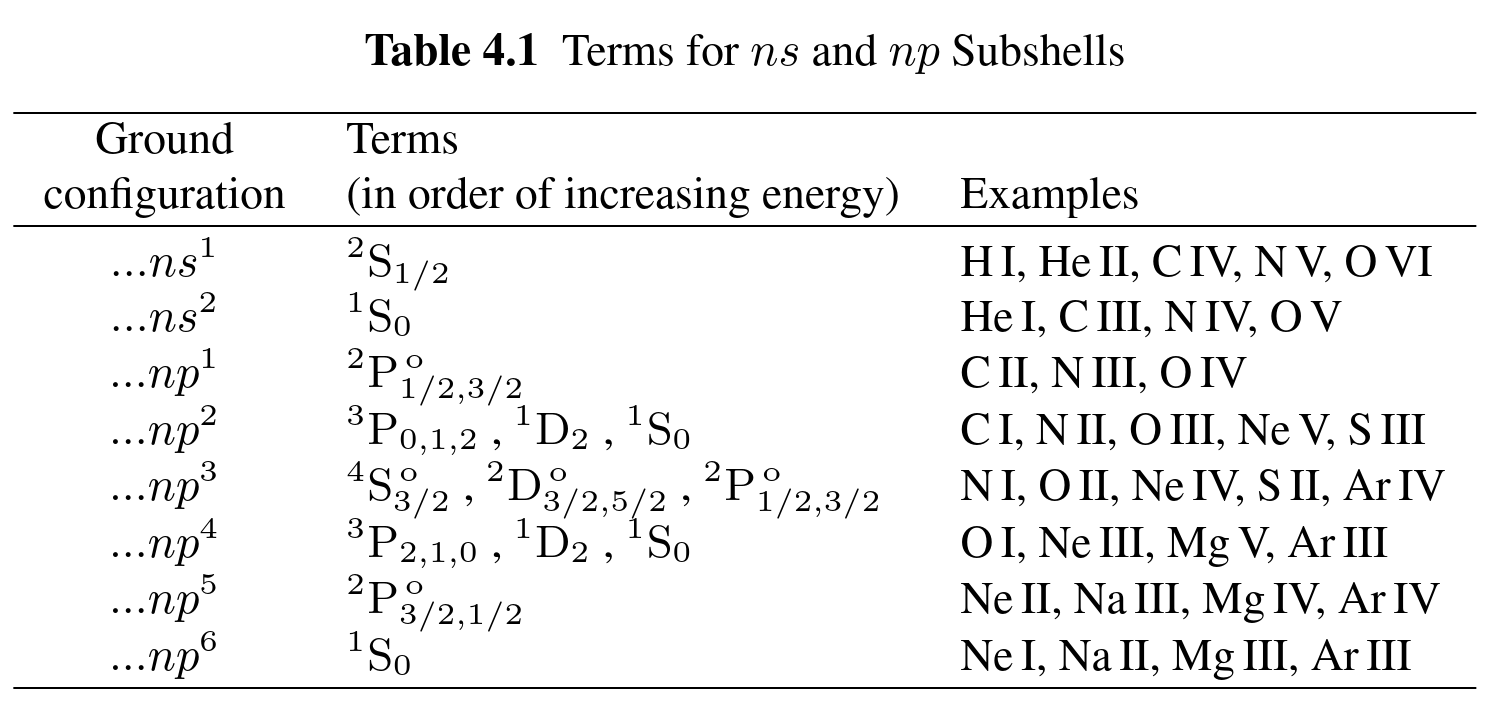

We can compute those *same* values and check that they match

In [7]:
for ne in [1, 2]:
    display(Math(terms.format_terms(terms.get_spectroscopic_terms(1, 0, ne), use_latex=True)))
for ne in range(1, 7):
    display(Math(terms.format_terms(terms.get_spectroscopic_terms(2, 1, ne), use_latex=True)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

They match woop (note the flip in J order once you reach half-filled)!

# Energy Level Diagrams
The third and final code product of my project is energy level diagrams. Given a list of spectroscopic terms and a list of transitions I can create an energy level diagram. Each transition is of the form ($n_u, n_l, \lambda$), where $n_u$ is the upper level, $n_l$ is lower level and $\lambda$ is the wavelength of photon corresponding to the transition. A value of $n=1$ corresponds to the first term supplied.

## Simple example
Here's an imaginary energy level diagram just to demonstrate its usage. I'll show a more realistic version in the next section.

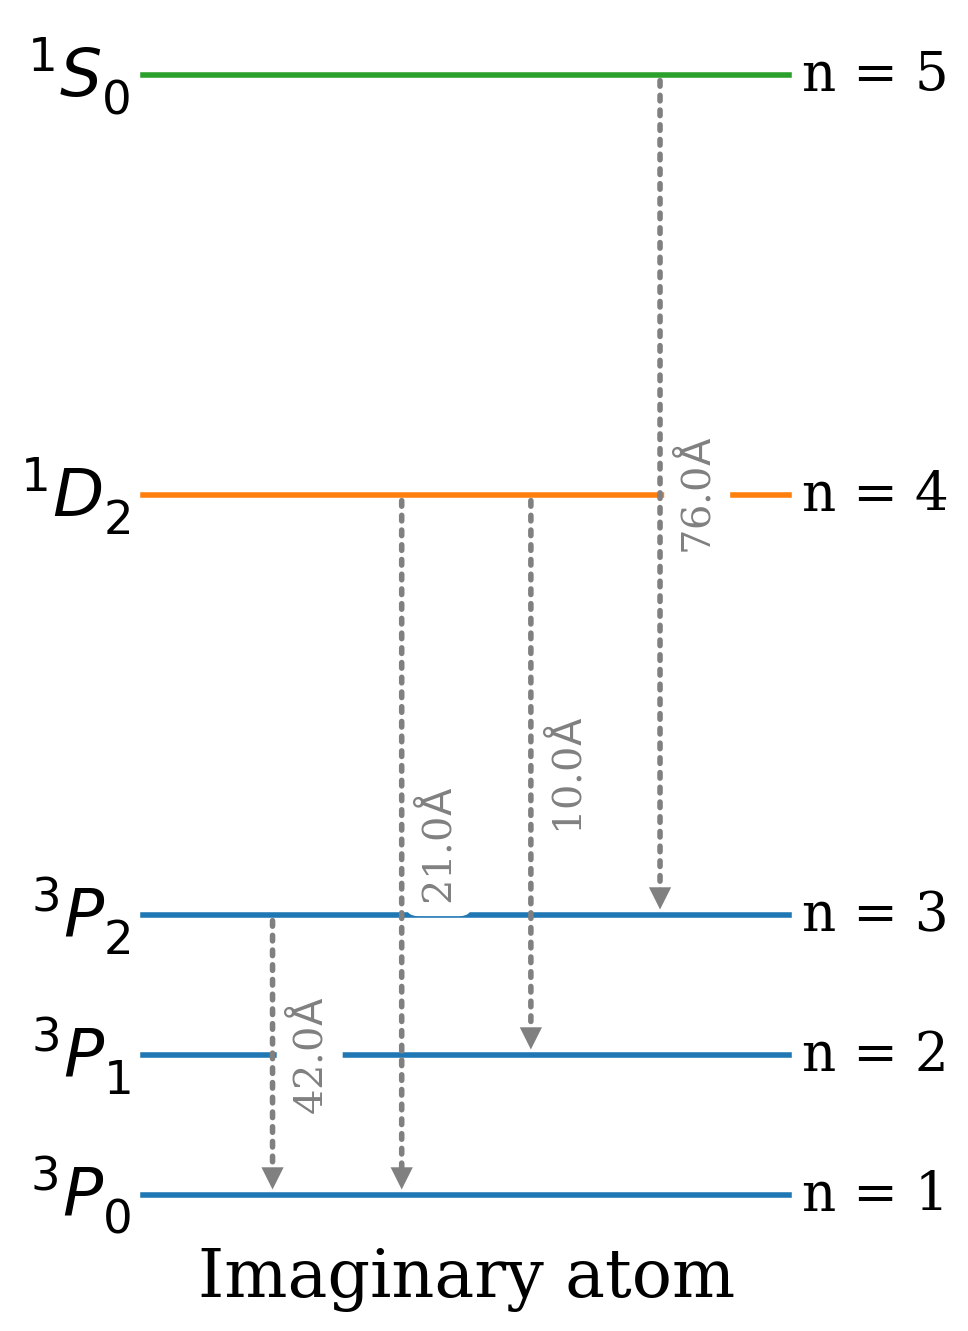

In [8]:
levels.plot_energy_levels(terms.get_spectroscopic_terms(2, 1, 2),
                          [(3, 1, 42 * u.Angstrom),
                           (4, 2, 10 * u.Angstrom),
                           (4, 1, 21 * u.Angstrom),
                           (5, 3, 76 * u.Angstrom)],
                          title="Imaginary atom", figsize=(5, 8));

## Customised settings
You can also supply a pre-created figure, change the size of the figure and which labels are present.

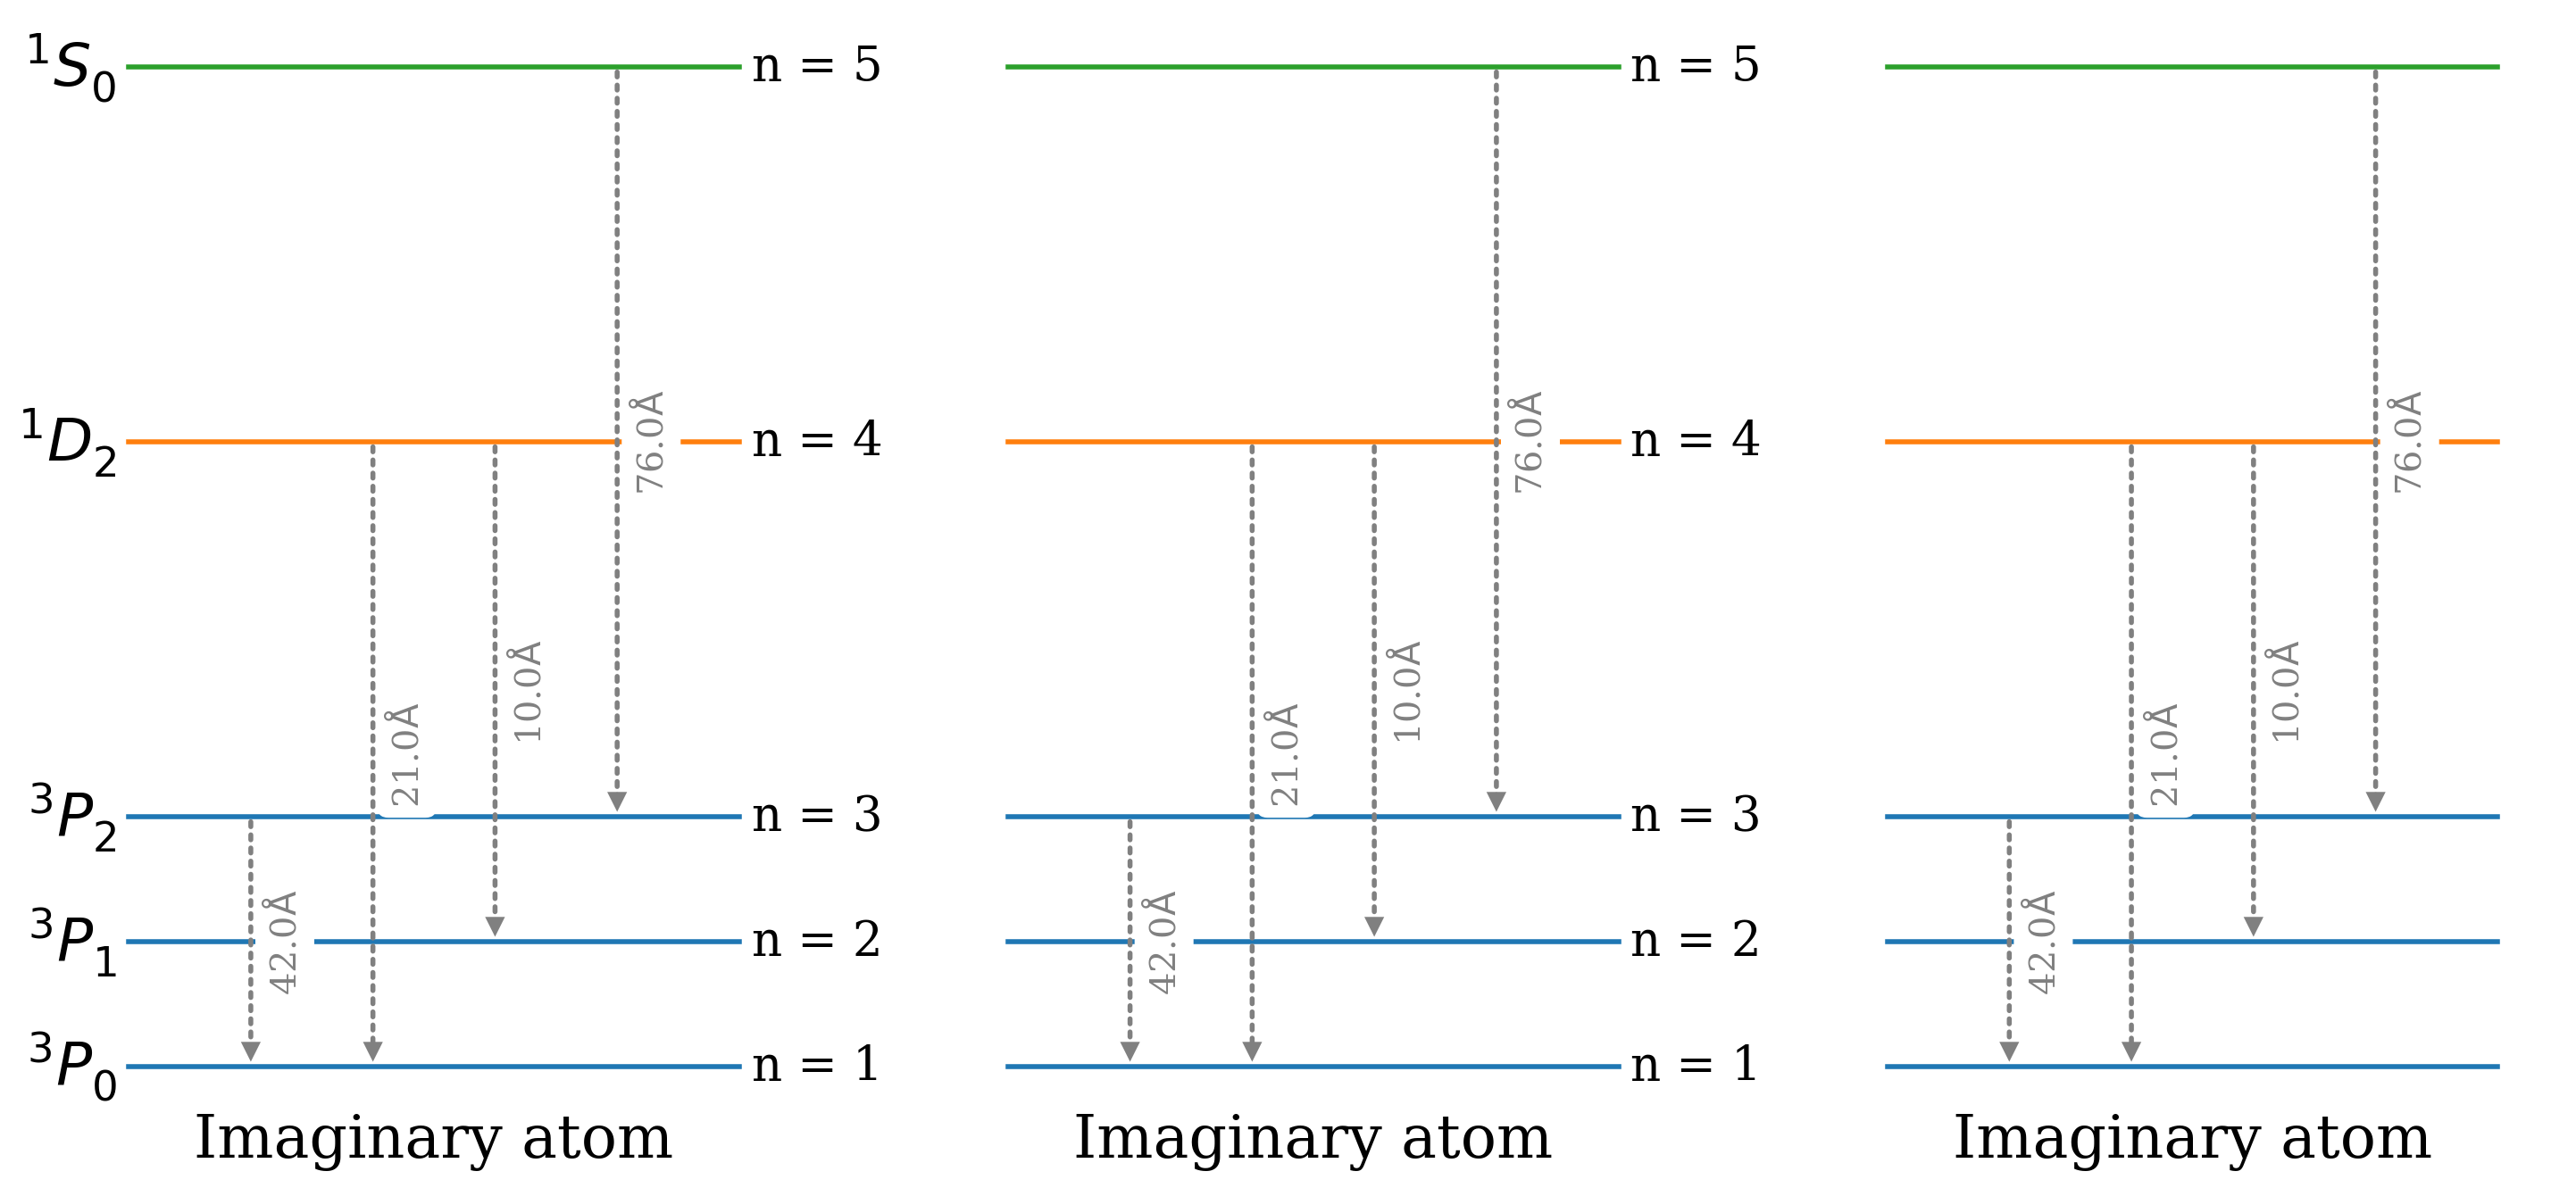

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
levels.plot_energy_levels(terms.get_spectroscopic_terms(2, 1, 2), [(3, 1, 42 * u.Angstrom),
                                                                   (4, 2, 10 * u.Angstrom),
                                                                   (4, 1, 21 * u.Angstrom),
                                                                   (5, 3, 76 * u.Angstrom)],
                          title="Imaginary atom", fig=fig, ax=axes[0], show=False)
levels.plot_energy_levels(terms.get_spectroscopic_terms(2, 1, 2), [(3, 1, 42 * u.Angstrom),
                                                                   (4, 2, 10 * u.Angstrom),
                                                                   (4, 1, 21 * u.Angstrom),
                                                                   (5, 3, 76 * u.Angstrom)],
                          title="Imaginary atom", fig=fig, ax=axes[1], show=False, show_term_labels=False)
levels.plot_energy_levels(terms.get_spectroscopic_terms(2, 1, 2), [(3, 1, 42 * u.Angstrom),
                                                                   (4, 2, 10 * u.Angstrom),
                                                                   (4, 1, 21 * u.Angstrom),
                                                                   (5, 3, 76 * u.Angstrom)],
                          title="Imaginary atom", fig=fig, ax=axes[2], show=False, show_term_labels=False, show_n_labels=False)
plt.show()

You could also make a really tall plot for something with a lot of energy levels and not even include any transitions.

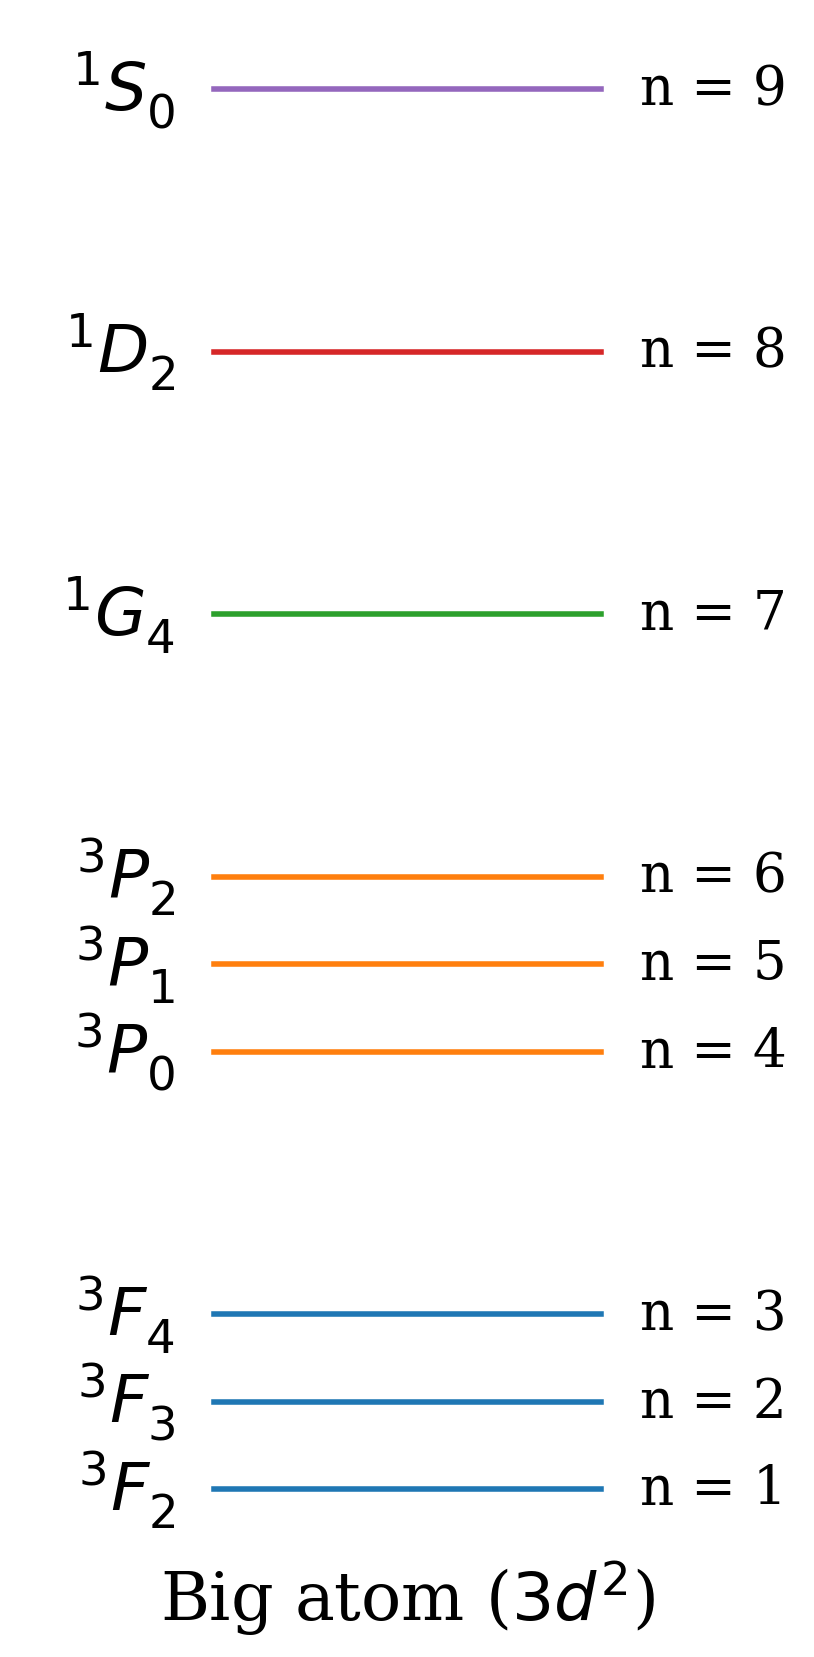

In [10]:
levels.plot_energy_levels(terms.get_spectroscopic_terms(3, 2, 2),
                          title=r"Big atom ($3d^2$)", figsize=(5, 10));

## Permitted & Forbidden transitions
I also check whether a transition is permitted and format the arrow differently based on this. Here's an example with fake spectroscopic terms and transition to illustrate it.
- The first transition is forbidden and has a dotted line
- The second transition is semi-forbidden as its spin changes and has a dashed line
- The third transition is permitted and has a solid line

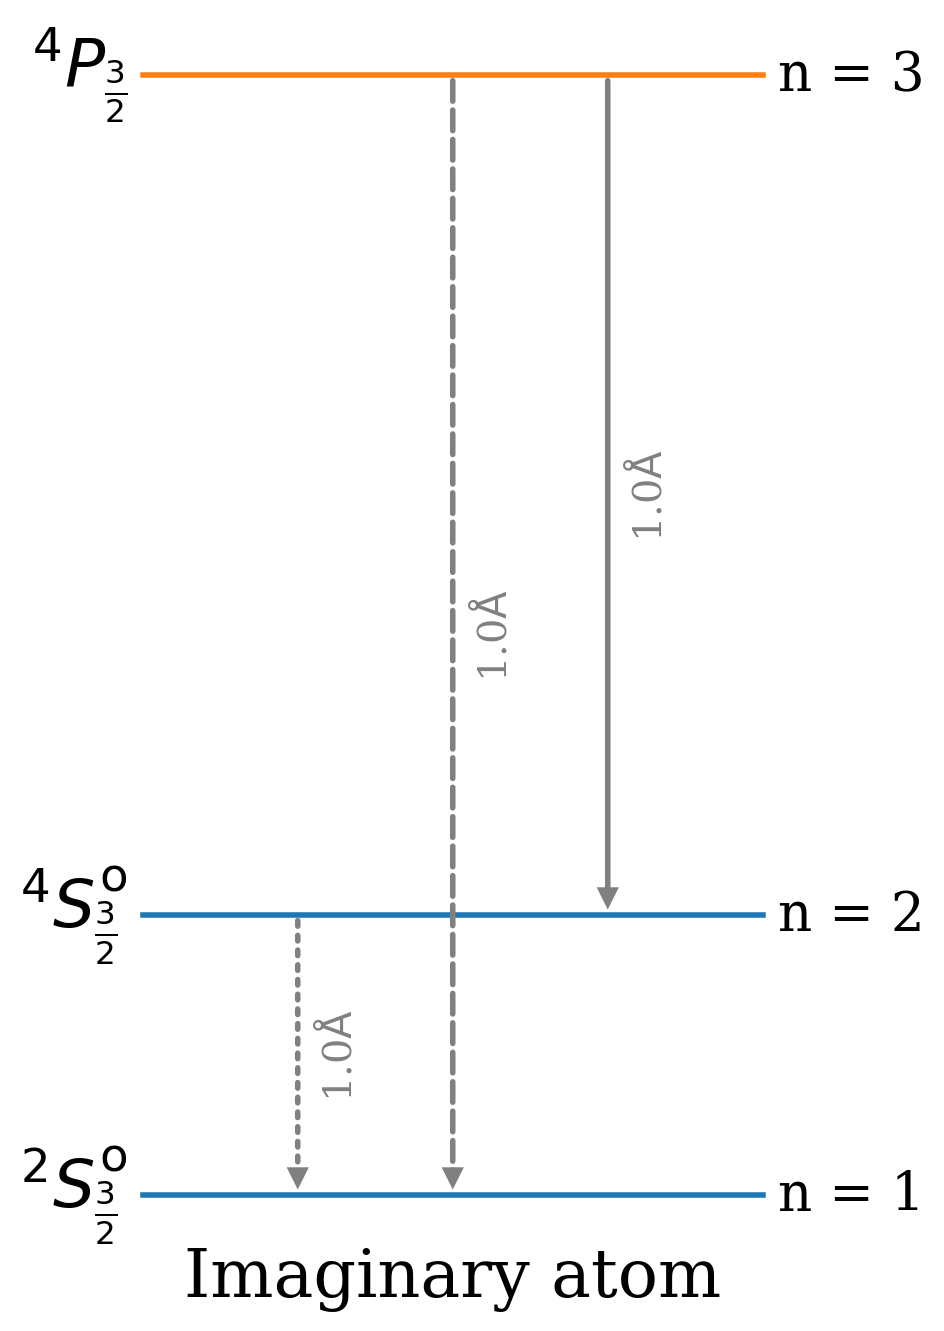

In [11]:
levels.plot_energy_levels([(2, 0, 3/2, 0), (4, 0, 3/2, 0), (4, 1, 3/2, 1)],
                          [(2, 1, 1 * u.Angstrom),
                           (3, 2, 1 * u.Angstrom),
                           (3, 1, 1 * u.Angstrom)],
                          title="Imaginary atom", figsize=(5, 8));

You can also find out _why_ a specific transition is permitted/forbidden like so:

In [12]:
t_flag, reasons = levels.apply_selection_rules((4, 0, 3/2, 0), (2, 0, 3/2, 0))
print(f"The flag returned was {t_flag}, this was because")
print(reasons)

t_flag, reasons = levels.apply_selection_rules((4, 0, 3/2, 1), (2, 1, 3/2, 0))
print(f"The flag returned was {t_flag}, this was because")
print(reasons)

The flag returned was 2, this was because
- The parity changed
- L changed from 0 to 0 - this is forbidden
- The spin changed (from 1.5 to 0.5)

The flag returned was 1, this was because
- The spin changed (from 1.5 to 0.5)



# Atom Class
Having made these things, I thought it would be nice to have a uniform interface to everything that is slightly easier to use. Enter Atom! From a single Python class you can get the configuration, terms and plot diagrams :D

You can instantiate an atom with a number of electrons and ionisations. It'll work out what it should be called too!

In [13]:
Atom(n_electron=6, n_ion=1)

<Atom: CII, 1s2 2s2 2p1, 2P(3/2)o>

Or instead just supply a string (in the same way as with the configurations that I explained above)

In [14]:
Atom(name="CII")

<Atom: CII, 1s2 2s2 2p1, 2P(3/2)o>

As you can see, the electronic configuration and terms are automatically calculated (I only show the lowest energy term for brevit though). You can then store this class instance and get all of these values.

In [15]:
sII = Atom(name="SII")

In [16]:
sII.configuration

'1s2 2s2 2p6 3s2 3p3'

In [17]:
sII.terms

'4S(3/2)o, 2D(3/2)o, 2D(5/2)o, 2P(1/2)o, 2P(3/2)o'

We can also now plot a real energy level diagram using the transition wavelengths that we were given in the week 5 in-class problem.

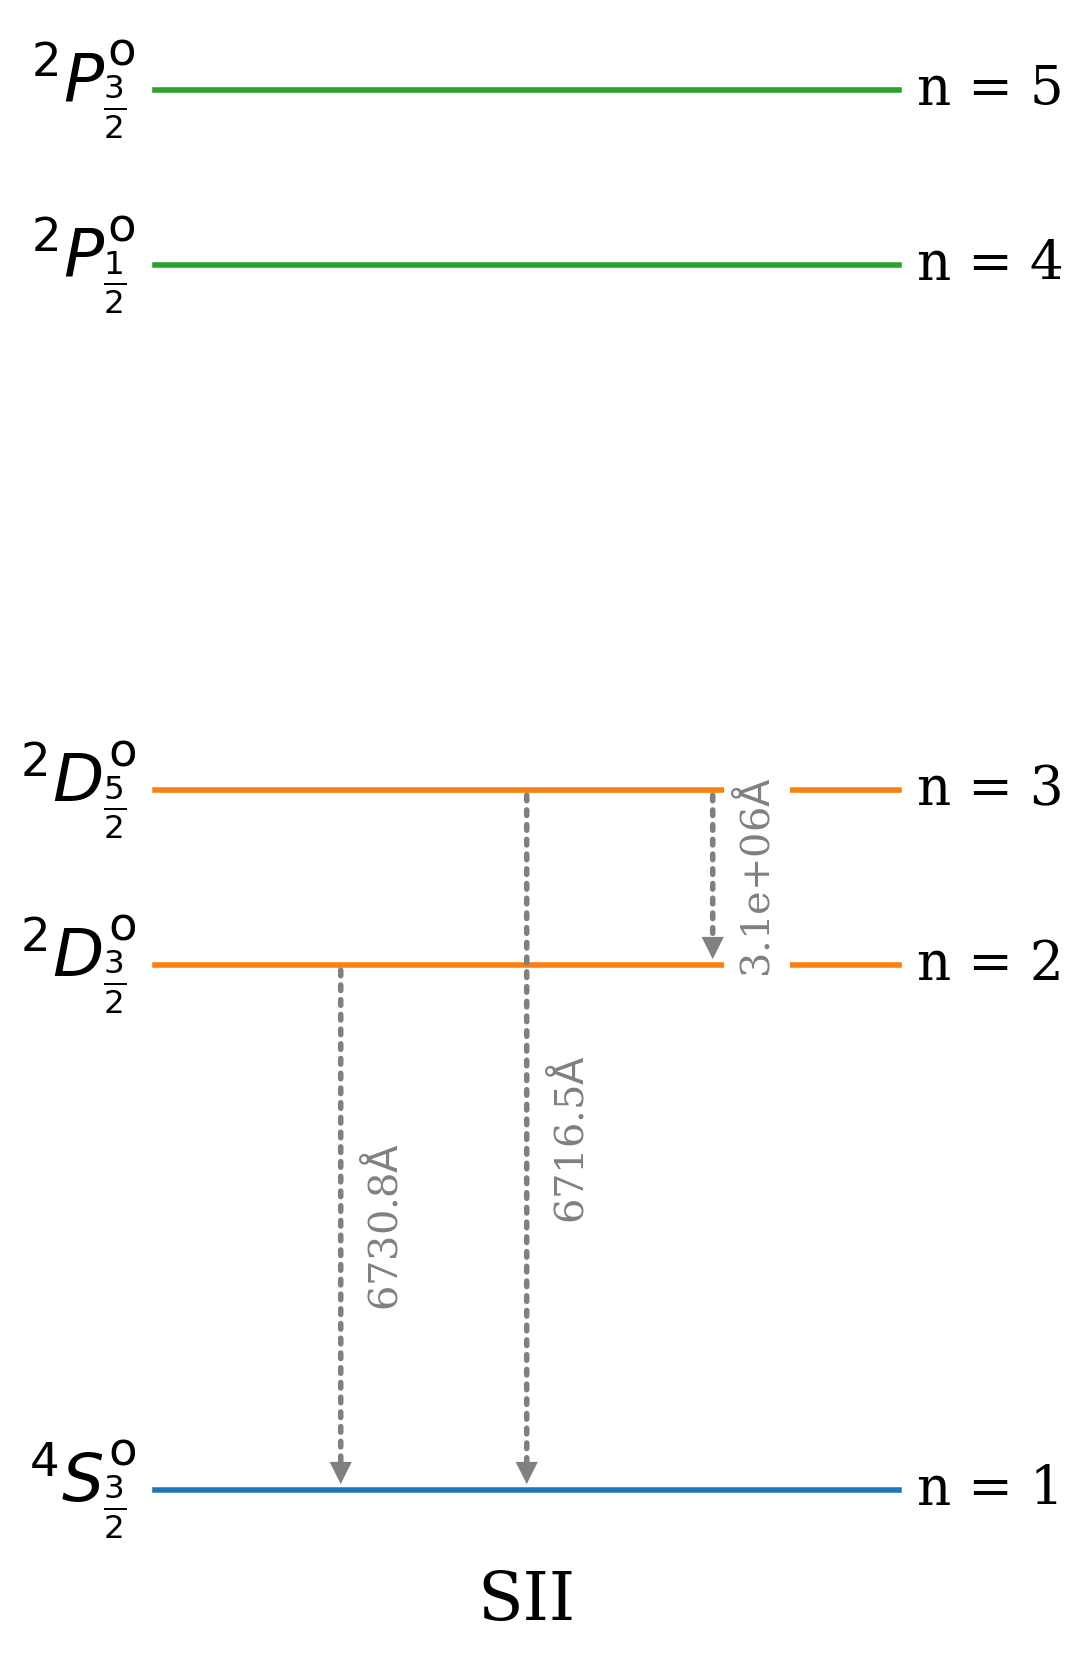

In [18]:
sII.plot_energy_levels(transitions=[(2, 1, 6730.8 * u.Angstrom),
                                    (3, 1, 6716.5 * u.Angstrom),
                                    (3, 2, 3.145e6 * u.Angstrom)], show_all_levels=True);

You can also change the Atom as you go. Say you start with OII, you can then further ionise it.

In [19]:
O = Atom("OII")
O

<Atom: OII, 1s2 2s2 2p3, 2P(3/2)o>

In [20]:
O.ionise(3)
O

<Atom: OV, 1s2 2s2, 1S0>

Or add electrons back!

In [21]:
O.ionise(-7)
O

<Atom: O3-, 1s2 2s2 2p6 3s1, 2S(1/2)>

And that's all I've got - I hope you enjoyed reading about my project! :)

In [22]:
Atom("VIV")

<Atom: VIV, 1s2 2s2 2p6 3s2 3p6 3d2, 1S0>

# Discussion
Here are a couple of quick topics for discussion that I noticed whilst designing this code and thought could be interesting to comment on.

## Periodic Table Shape
I imagine I'd probably have learnt this in Chemistry if I had done it for A-levels but I never really understood the strange shape of the periodic table. Why does helium end up miles from hydrogen? Why is there still a gap between magnesium and aluminium? Now I know!

We can see this through the electronic configuration. Each row relates to a different value of $n$ whilst the column is indicative of how filled the subshell is. The gaps between the columns are because, for lower values of $n$, higher values of $l$ are not possible. For example, there is no $1p$ subshell and so there's a huge gap between H and He. Additionally there is no $2d$ subshell and so there's a gap between $\rm Mg$ and $\rm Al$.

In this way, you can use the location on the periodic table to predict the electronic configuration and it'll work perfectly...unless the element doesn't follow the Aufbau Principle (I'm looking at you Chromium).

## Spectroscopic Term Symmetry

I also noticed that within subshells there is a symmetry depending on how full the subshell is. For example, if the outermost subshell is $2p2$, or $2p4$, the spectroscopic terms are identical! The difference is that, due to Hund's third rule, the ordering of the terms is different. Check it out!

In [23]:
terms.get_spectroscopic_terms(2, 1, 2, formatted=True)

'3P0, 3P1, 3P2, 1D2, 1S0'

In [24]:
terms.get_spectroscopic_terms(2, 1, 4, formatted=True)

'3P2, 3P1, 3P0, 1D2, 1S0'

So you can definitely save some time on re-calculating terms if you've got it for the corresponding one.

You can also see that only the outermost shell matters, whether you're in the $2p1$ subshell of $3p1$ subshell, the spectroscopic terms are the same! Here's it in action.

In [25]:
terms.get_spectroscopic_terms(2, 1, 1, formatted=True)

'2P(1/2)o, 2P(3/2)o'

In [26]:
terms.get_spectroscopic_terms(3, 1, 1, formatted=True)

'2P(1/2)o, 2P(3/2)o'

## Problems with the Aufbau Principle

The Aufbau principle describes the order in which subshells are filled for when we determine the electronic configuration. It looks like this:

<div style="text-align:center">
    <img src="https://chemistrygod.com/assets/media/image/aufbau-principle-diagram.png" width="50%">
</div>

This works well for most cases, however there are a couple of exceptions and cases in which it does not work. For example, as I mentioned above, Chromium is an old enemy of mine which refuses to obey the Aufbau principle. Check out its electronic configuration compared to its neighbours

In [27]:
for el in ["Ti", "V", "Cr", "Mn"]:
    if el == "Cr":
        print(el, "\t", Atom(el).configuration, "<--- this one is weird")
    else:
        print(el, "\t", Atom(el).configuration)

Ti 	 1s2 2s2 2p6 3s2 3p6 4s2 3d2
V 	 1s2 2s2 2p6 3s2 3p6 4s2 3d3
Cr 	 1s2 2s2 2p6 3s2 3p6 4s1 3d5 <--- this one is weird
Mn 	 1s2 2s2 2p6 3s2 3p6 4s2 3d5


There are several elements that are exceptions to the principle as you go higher (looking at you Copper) and this is due to the stability afforded by having multiple half filled shells and the relatively small energy gap between levels.

The other problem that I had was with ions. When ionising an atom, the configuration does not simply result from taking one step back in the Aufbau principle but additionally takes Hund's rules into account. For example, when ionising Iron you actually remove an electron from the $4s$ subshell instead of the $3d$ shell.

In [28]:
Atom("Fe")

<Atom: Fe, 1s2 2s2 2p6 3s2 3p6 4s2 3d6, 1S0>

In [29]:
Atom("FeII")

/home/tomwagg/Documents/uw-grad-classes/541_ism/final_project/atom.py:69: UserWarning: This atom/ion has more than one half-filled subshell! The terms returned by this function only correspond to the *outermost* half-filled subshell.
  warnings.warn(("This atom/ion has more than one half-filled subshell! The terms returned by this "


<Atom: FeII, 1s2 2s2 2p6 3s2 3p6 3d6 4s1, 2S(1/2)>

This is not what the Aufbau principle would suggest and Iron is not usually an exception to the rule. But it can be understood as the effect of electron shielding and the fact that removing an electron from the outermost shell (in terms of $n$) is easier than the more shielded $3d$ shell.

One unsolved problem in my project was that determining the terms for something with **two** half-filled shells is confusing for me since it could have two different sets of terms and I'm not sure how they would combine.

# Thanks!
Thanks for reading and the class in general! I've had a great time and particularly enjoyed this project and exploring more about how to calculate these configurations and terms algorithmically.